In [1]:
import pymaid

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
import os 

In [2]:
rm = pymaid.connect_catmaid()
# question: why doesn't it see the environment variables in .bash_profile? 

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


# To do: 
- Group 2 sides, and cells of the same type together 
    - first get the side and type info separately 
- Incorporate paths of different lengths 
- Fix neuron name code 

# Getting DANs and OPNs 

## DANs

In [58]:
dans_dict = pymaid.get_names('annotation:/DAN')
dans = pd.DataFrame(dans_dict.items(), columns = ['skid','full_name'])
# split name into side and name 
dans['side'] = [aname.split()[1] for aname in dans.full_name]
dans

Fetching:   0%|          | 0/18 [00:00<?, ?it/s]

skid    full_name   side
0    2506050  MBE4a right  right
1    3886356   MBE4h left   left
2    4381377   MBE4f left   left
3    4414163   MBE1d left   left
4    4414184  MBE1d right  right
5    4884579  MBE1b right  right
6    5966099  MBE4h right  right
7    6611894  MBE1c right  right
8    7057894   MBE1c left   left
9    7901791   MBE4a left   left
10  10673895  MBE4f right  right
11  12871993   MBE1b left   left
12  15592096   MBE4g left   left
13  16240569  MBE4g right  right

In [3]:
pymaid.get_annotated('MB nomenclature', include_sub_annotations = True)

INFO  : Searching for: MB nomenclature (pymaid)


id                                 name        type skeleton_ids
0           26                                KC #0      neuron         [29]
1        32801                           vchA/B a1l      neuron    [7790597]
2       138696  lch5-24_contra_projection VLEL9_t3r      neuron    [2226852]
3       159277                         lch5-2/4 a1l      neuron     [159280]
4       162290                         lch5-2/4 a1l      neuron     [162293]
...        ...                                  ...         ...          ...
2094  21296459                                CN-57  annotation          NaN
2095  21296463                                CN-58  annotation          NaN
2096  21297300                                 CN-7  annotation          NaN
2097  21297331                                CN-16  annotation          NaN
2098  21297342                                CN-17  annotation          NaN

[2099 rows x 4 columns]

In [59]:
# get all annotations 
dan_annotations = pymaid.get_annotations(dans.skid.values)

# retrieve the DAN annotations 
names = []
for skid in dans.skid: 
    names.extend([anno for anno in dan_annotations[skid] if 'DAN-' in anno and anno[-1]=='1'])
dans['name'] = names
dans

skid    full_name   side    name
0    2506050  MBE4a right  right  DAN-f1
1    3886356   MBE4h left   left  DAN-d1
2    4381377   MBE4f left   left  DAN-g1
3    4414163   MBE1d left   left  DAN-j1
4    4414184  MBE1d right  right  DAN-j1
5    4884579  MBE1b right  right  DAN-k1
6    5966099  MBE4h right  right  DAN-d1
7    6611894  MBE1c right  right  DAN-i1
8    7057894   MBE1c left   left  DAN-i1
9    7901791   MBE4a left   left  DAN-f1
10  10673895  MBE4f right  right  DAN-g1
11  12871993   MBE1b left   left  DAN-k1
12  15592096   MBE4g left   left  DAN-c1
13  16240569  MBE4g right  right  DAN-c1

## OPNS

In [60]:
opns_dict = pymaid.get_names('annotation:ORN PNs')
opns = pd.DataFrame(opns_dict.items(), columns = ['skid','full_name'])
opns['side'] = [aname.split()[-1] for aname in opns.full_name]
# reverse split, remove the last word 
opns['name'] = [aname.rsplit(' ', 1)[0] for aname in opns.full_name]
opns

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


skid               full_name   side              name
0    3486381             42a PN left   left            42a PN
1    4354933             85c PN left   left            85c PN
2    4493199             13a PN left   left            13a PN
3    4651929      94a & 94b PN right  right      94a & 94b PN
4    7092417       47a & 33b PN left   left      47a & 33b PN
5    7107433             45b PN left   left            45b PN
6    7198338             24a PN left   left            24a PN
7    7515491             49a PN left   left            49a PN
8    7843730             74a PN left   left            74a PN
9    7845346             63a PN left   left            63a PN
10   7851153             82a PN left   left            82a PN
11   7852250             45a PN left   left            45a PN
12   7864823             59a PN left   left            59a PN
13   7865652             22c PN left   left            22c PN
14   7865696              1a PN left   left             1a PN
15   7865767             83a PN left   left            83a PN
16   7873135             42b PN left   left            42b PN
17   7916593             30a PN left   left            30a PN
18   7934904   35a PN bilateral left   left  35a PN bilateral
19   7935088  35a PN bilateral right  right  35a PN bilateral
20   8021456             33a PN left   left            33a PN
21   8140109            74a PN right  right            74a PN
22   8243455            83a PN right  right            83a PN
23   8244723            42a PN right  right            42a PN
24   8244823            13a PN right  right            13a PN
25   8245014            59a PN right  right            59a PN
26   8245146            82a PN right  right            82a PN
27   8245513            63a PN right  right            63a PN
28   8245692            42b PN right  right            42b PN
29   8245869            24a PN right  right            24a PN
30   8246081            67b PN right  right            67b PN
31   8246750      47a & 33b PN right  right      47a & 33b PN
32   8247451            45a PN right  right            45a PN
33   8248631            22c PN right  right            22c PN
34   8252067             1a PN right  right             1a PN
35   8253413            45b PN right  right            45b PN
36   8256186            30a PN right  right            30a PN
37   8399890       94a & 94b PN left   left      94a & 94b PN
38  11279244            49a PN right  right            49a PN
39  13589251            33a PN right  right            33a PN
40  14604028            85c PN right  right            85c PN
41  16259595             67b PN left   left            67b PN

## together 

In [61]:
# collection of all meta data of neurons 
allns = dans.append(opns, ignore_index=True)
allns.head()

skid    full_name   side    name
0  2506050  MBE4a right  right  DAN-f1
1  3886356   MBE4h left   left  DAN-d1
2  4381377   MBE4f left   left  DAN-g1
3  4414163   MBE1d left   left  DAN-j1
4  4414184  MBE1d right  right  DAN-j1

# connectivity

## the ugly way: get the upstream of upstream partners of DANs

### DAN-upstream

In [62]:
dansus = pymaid.get_partners(dans.skid.values, directions = ['incoming'], min_confidence=3)
dansus.head()

INFO  : Fetching connectivity table for 14 neurons (pymaid)
INFO  : Done. Found 616 pre-, 0 postsynaptic and 0 gap junction-connected neurons (pymaid)


neuron_name skeleton_id num_nodes  relation 2506050  \
0              Mickey Mouse_left    15623649      6721  upstream      27   
1  Mickey Mouse_right; BLP12 b 2    20443457      7174  upstream      18   
2                           KC42    11725803      4413  upstream       2   
3                     KC no pair     4411505      3959  upstream       3   
4                           KC13    14898816      4273  upstream       4   

  3886356 4381377 4414163 4414184 4884579 5966099 6611894 7057894 7901791  \
0       6      18       0       0       0      14       0       0       9   
1       6      21       0       0       0      11       0       0       9   
2       3       0      13       4       3       7       3       8       8   
3       5       0       9       3       7       1       4       4       2   
4       3       0      13       5       9       9       2       5       1   

  10673895 12871993 15592096 16240569  total  
0       14        0        0        0   88.0  
1       10        0        0        0   75.0  
2        8        7        2        4   72.0  
3       11        4        5        5   63.0  
4        2        6        3        1   63.0

In [63]:
dansus["iskc"] = ['KC' in name for name in dansus.neuron_name]
dansus.head()

neuron_name skeleton_id num_nodes  relation 2506050  \
0              Mickey Mouse_left    15623649      6721  upstream      27   
1  Mickey Mouse_right; BLP12 b 2    20443457      7174  upstream      18   
2                           KC42    11725803      4413  upstream       2   
3                     KC no pair     4411505      3959  upstream       3   
4                           KC13    14898816      4273  upstream       4   

  3886356 4381377 4414163 4414184 4884579 5966099 6611894 7057894 7901791  \
0       6      18       0       0       0      14       0       0       9   
1       6      21       0       0       0      11       0       0       9   
2       3       0      13       4       3       7       3       8       8   
3       5       0       9       3       7       1       4       4       2   
4       3       0      13       5       9       9       2       5       1   

  10673895 12871993 15592096 16240569  total   iskc  
0       14        0        0        0   88.0  False  
1       10        0        0        0   75.0  False  
2        8        7        2        4   72.0   True  
3       11        4        5        5   63.0   True  
4        2        6        3        1   63.0   True

In [64]:
# total post synapse for each DAN 
dantotpost = dansus[dans.skid].sum()
dantotpost

2506050     488
3886356     579
4381377     615
4414163     555
4414184     569
4884579     623
5966099     610
6611894     525
7057894     552
7901791     424
10673895    685
12871993    564
15592096    302
16240569    259
dtype: object

#### KCs

In [65]:
# total number of synapses from / not from KCs for each DAN 
kcdansum = dansus.groupby('iskc')[dans.skid].apply(lambda x : x.sum()).T
kcdansum['total_post'] = dantotpost[kcdansum.index.values]
# calculate input proportion by KCs 
kcdansum['kc_inprop'] = kcdansum.iloc[:,1] / kcdansum.total_post
kcdansum

iskc      False  True total_post kc_inprop
2506050     220   268        488   0.54918
3886356     320   259        579  0.447323
4381377     384   231        615   0.37561
4414163     124   431        555  0.776577
4414184     158   411        569   0.72232
4884579     230   393        623  0.630819
5966099     349   261        610  0.427869
6611894     238   287        525  0.546667
7057894     296   256        552  0.463768
7901791     179   245        424   0.57783
10673895    401   284        685  0.414599
12871993    220   344        564  0.609929
15592096     90   212        302  0.701987
16240569     93   166        259  0.640927

Are they symmetric left/right? 

In [66]:
kcdansum.merge(dans, left_index = True, right_on = 'skid', how = 'left').sort_values('name')

False  True total_post kc_inprop      skid    full_name   side    name
12     90   212        302  0.701987  15592096   MBE4g left   left  DAN-c1
13     93   166        259  0.640927  16240569  MBE4g right  right  DAN-c1
1     320   259        579  0.447323   3886356   MBE4h left   left  DAN-d1
6     349   261        610  0.427869   5966099  MBE4h right  right  DAN-d1
0     220   268        488   0.54918   2506050  MBE4a right  right  DAN-f1
9     179   245        424   0.57783   7901791   MBE4a left   left  DAN-f1
2     384   231        615   0.37561   4381377   MBE4f left   left  DAN-g1
10    401   284        685  0.414599  10673895  MBE4f right  right  DAN-g1
7     238   287        525  0.546667   6611894  MBE1c right  right  DAN-i1
8     296   256        552  0.463768   7057894   MBE1c left   left  DAN-i1
3     124   431        555  0.776577   4414163   MBE1d left   left  DAN-j1
4     158   411        569   0.72232   4414184  MBE1d right  right  DAN-j1
5     230   393        623  0.630819   4884579  MBE1b right  right  DAN-k1
11    220   344        564  0.609929  12871993   MBE1b left   left  DAN-k1

But we don't care about pathways from KCs to DANs. 

#### Any PNs directly connected to DANs? 

In [67]:
dansus[[' PN ' in name for name in dansus['neuron_name']]]

neuron_name skeleton_id num_nodes  \
537  BLDa b 6_from Another temp PN (ds5th-2) right     4099900      4553   

     relation 2506050 3886356 4381377 4414163 4414184 4884579 5966099 6611894  \
537  upstream       0       0       0       0       0       0       1       0   

    7057894 7901791 10673895 12871993 15592096 16240569  total   iskc  
537       0       0        0        0        0        0    1.0  False

Doesn't really count as it's very weak. 

#### edgelist 

In [68]:
danus_el = dansus.melt(id_vars = ['neuron_name', 'skeleton_id', 'iskc'], 
                       value_vars = dans.skid, 
                       # the skeleton ids of DANs 
                       var_name = 'ds_skid', 
                       value_name='syn_count')
# remove the rows with syn_count = 0, and keep the none-KC ones 
danus_el = danus_el.loc[(danus_el.syn_count != 0) & (danus_el.iskc == False)]

# merge the total postsynaptic neuron (DAN in this case) synapse count 
# using list() removes the index of the total post synapses. Otherwise there's an error
danus_el['totpostsyn'] = list(dantotpost[danus_el.ds_skid])
danus_el['weight'] = danus_el.syn_count / danus_el.totpostsyn

# add downstream neuron (DAN) type 
danus_el = danus_el.merge(allns, left_on = 'ds_skid', right_on = 'skid', how = 'left')
# add upstream (skeleton_id) neuron type
danus_el = danus_el.merge(allns, 
                          left_on = 'skeleton_id', right_on = 'skid', 
                          how = 'left', 
                          suffixes = ('_ds','_us'))
danus_el.head()

neuron_name skeleton_id   iskc  ds_skid  \
0                           Mickey Mouse_left    15623649  False  2506050   
1               Mickey Mouse_right; BLP12 b 2    20443457  False  2506050   
2           J ; Mid DPMpl lat  (F4 pair)_left    15668309  False  2506050   
3                           Headphone-2_right    11234536  False  2506050   
4  D ; Feedback neuron from nociceptive_right    14077615  False  2506050   

  syn_count  totpostsyn    weight  skid_ds full_name_ds side_ds name_ds  \
0        27         488  0.055328  2506050  MBE4a right   right  DAN-f1   
1        18         488  0.036885  2506050  MBE4a right   right  DAN-f1   
2         2         488  0.004098  2506050  MBE4a right   right  DAN-f1   
3         6         488  0.012295  2506050  MBE4a right   right  DAN-f1   
4        18         488  0.036885  2506050  MBE4a right   right  DAN-f1   

  skid_us full_name_us side_us name_us  
0     NaN          NaN     NaN     NaN  
1     NaN          NaN     NaN     NaN  
2     NaN          NaN     NaN     NaN  
3     NaN          NaN     NaN     NaN  
4     NaN          NaN     NaN     NaN

### group the sides together 
This is only done for the last layer of connections (where the postsynaptic neurons are DANs). If this was done, then pathways (e.g. from the left and the right) need to be summed in the end. 
If left and right pathways are calculated separately, then one should take an average in the end. Currently this section isn't run, and we should take an average between sides in the end. 

In [69]:
# # total postsynapse count per type of DAN 
# dans['totpost'] = dantotpost[dans.skid].values
# dantype_totpost = dans.groupby('name')['totpost'].sum()
# dantype_totpost

In [70]:
# danus_el = dansus.melt(id_vars = ['neuron_name', 'skeleton_id', 'iskc'], 
#                        value_vars = dans.skid, 
#                        # the skeleton ids of DANs 
#                        var_name = 'ds_skid', 
#                        value_name='syn_count')
# # remove the rows with syn_count = 0, and keep the none-KC ones 
# danus_el = danus_el.loc[(danus_el.syn_count != 0) & (danus_el.iskc == False)]
# # add cell types for post synaptic neurons 
# danus_el = danus_el.merge(allns, left_on = 'ds_skid', right_on = 'skid', how = 'left')

# # add total postsynapse number per type 
# danus_el['totpostsyn_type'] = dantype_totpost[danus_el.name].values
# # aggregate by postsynaptic DAN type 
# danus_el = danus_el.groupby(['neuron_name','skeleton_id','name','totpostsyn_type'])['syn_count'].sum().reset_index()
# # calculate input proportion per type 
# danus_el['weight'] = danus_el.syn_count / danus_el.totpostsyn_type

# danus_el

### Upstream of the non-KC DAN-upstream partners 

In [71]:
nonkcs_dansus_skids = dansus.loc[dansus.iskc == False, 'skeleton_id'].unique()
dansusus = pymaid.get_partners(nonkcs_dansus_skids, directions = ['incoming'], min_confidence=3)
dansusus

INFO  : Fetching connectivity table for 470 neurons (pymaid)
INFO  : Done. Found 4061 pre-, 0 postsynaptic and 0 gap junction-connected neurons (pymaid)


neuron_name skeleton_id num_nodes  relation  \
0                            MBE9b left    14082322      6283  upstream   
1         Mickey Mouse_right; BLP12 b 2    20443457      7174  upstream   
2                           MBE9b right     7840791      7298  upstream   
3                     Mickey Mouse_left    15623649      6721  upstream   
4     J ; Mid DPMpl lat  (F4 pair)_left    15668309      4241  upstream   
...                                 ...         ...       ...       ...   
4056                    Neuron 21208179    21208178       239  upstream   
4057                    neuron 16353796    16353795        19  upstream   
4058                    neuron 16392353    16392352      1042  upstream   
4059                    neuron 17021829    17021828      1302  upstream   
4060          ASB Gust descending right    19190681      2351  upstream   

     15623649 20443457 15668309 11234536 14077615 17176781  ... 14071449  \
0           1        0       34        0        0        0  ...       10   
1          10        0        2        0        2        3  ...        0   
2           0        0        7        0        1        0  ...        0   
3           0        5        0        1        2        6  ...        0   
4          11        5        3        0        7        0  ...        0   
...       ...      ...      ...      ...      ...      ...  ...      ...   
4056        0        0        0        0        0        0  ...        0   
4057        0        0        0        0        0        0  ...        0   
4058        0        0        0        0        0        0  ...        0   
4059        0        0        0        0        0        0  ...        0   
4060        0        0        0        0        0        0  ...        0   

     12475432 17022668 12869029 19260450 9965610 16160495 6445994 18232369  \
0           0        0        1        0       0        1       0        0   
1          16        0        0        0       0       13       0        0   
2           0        0        0        0       0        0       0        0   
3          14        0        0        0       0        7       0        0   
4           2        0        0        0       0        0       0        0   
...       ...      ...      ...      ...     ...      ...     ...      ...   
4056        0        0        0        0       0        0       0        0   
4057        0        0        0        0       0        0       0        0   
4058        0        0        0        0       0        0       0        0   
4059        0        0        0        0       0        0       0        0   
4060        0        0        0        0       0        0       0        0   

      total  
0     602.0  
1     577.0  
2     570.0  
3     541.0  
4     312.0  
...     ...  
4056    1.0  
4057    1.0  
4058    1.0  
4059    1.0  
4060    1.0  

[4061 rows x 475 columns]

In [72]:
# any of them receive input from PNs? 
dansusus[dansusus['skeleton_id'].isin(opns.skid)]

neuron_name skeleton_id num_nodes  relation 15623649  \
354             67b PN right     8246081      3522  upstream        0   
599             42a PN right     8244723      3055  upstream        0   
737             22c PN right     8248631      2087  upstream        0   
744              42a PN left     3486381      2531  upstream        0   
763       47a & 33b PN right     8246750      2116  upstream        0   
881             42b PN right     8245692      2459  upstream        0   
902             24a PN right     8245869      2034  upstream        0   
985             63a PN right     8245513      2388  upstream        0   
986              74a PN left     7843730      2352  upstream        0   
1038  35a PN bilateral right     7935088      3983  upstream        0   
1061   35a PN bilateral left     7934904      4358  upstream        0   
1073            85c PN right    14604028      2310  upstream        0   
1099            74a PN right     8140109      2106  upstream        0   
1227            45b PN right     8253413      2306  upstream        0   
1271            45a PN right     8247451      1975  upstream        0   
1300             1a PN right     8252067      1915  upstream        0   
1304             67b PN left    16259595      3130  upstream        0   
1332             42b PN left     7873135      2462  upstream        0   
1382            30a PN right     8256186      2313  upstream        0   
1410            13a PN right     8244823      2466  upstream        0   
1418            49a PN right    11279244      2496  upstream        0   
1433            83a PN right     8243455      2285  upstream        0   
1508      94a & 94b PN right     4651929      2625  upstream        0   
1520             45b PN left     7107433      2419  upstream        0   
1637             85c PN left     4354933      2534  upstream        0   
1674            59a PN right     8245014      1967  upstream        0   
1724             24a PN left     7198338      1756  upstream        0   
1728             45a PN left     7852250      1837  upstream        0   
1797            33a PN right    13589251      3288  upstream        0   
1954             63a PN left     7845346      2105  upstream        0   
1955             22c PN left     7865652      1971  upstream        0   
1958             59a PN left     7864823      1891  upstream        0   
2010             49a PN left     7515491      1902  upstream        0   
2022             30a PN left     7916593      2003  upstream        0   
2271             83a PN left     7865767      1906  upstream        0   
2350             13a PN left     4493199      1849  upstream        0   
2376             33a PN left     8021456      2338  upstream        0   
2706       47a & 33b PN left     7092417      1755  upstream        0   
2877       94a & 94b PN left     8399890      2423  upstream        0   
3522              1a PN left     7865696      1723  upstream        0   

     20443457 15668309 11234536 14077615 17176781  ... 14071449 12475432  \
354         0        0        0        0        0  ...        0        0   
599         0        0        0        0        0  ...        0        0   
737         0        0        0        0        0  ...        0        0   
744         0        0        0        0        0  ...        0        0   
763         0        0        0        0        0  ...        0        0   
881         0        0        0        0        0  ...        0        0   
902         0        0        0        0        0  ...        0        0   
985         0        0        0        0        0  ...        0        0   
986         0        0        0        0        0  ...        0        0   
1038        0        0        0        0        0  ...        0        0   
1061        0        0        0        0        0  ...        0        0   
1073        0        0        0        0        0  ...        0        0   
1099        0        0        0    

Nothing super strong

Get total post synapses per neuron that's downstream of a DAN 

In [73]:
totpost_dansusus = dansusus[nonkcs_dansus_skids].sum()
totpost_dansusus

15623649    494
20443457    518
15668309    332
11234536    169
14077615    323
           ... 
19260450      3
9965610     194
16160495    173
6445994     230
18232369     71
Length: 470, dtype: object

#### edgelist

In [74]:
us_danus_el = dansusus.melt(id_vars = ['neuron_name', 'skeleton_id'], 
                       value_vars = nonkcs_dansus_skids, 
                       var_name = 'ds_skid', 
                       value_name='syn_count')
# remove the rows with syn_count = 0
us_danus_el = us_danus_el.loc[us_danus_el.syn_count != 0]

# merge the total postsynaptic neuronsynapse count 
# using list() removes the index of the total post synapses. Otherwise there's an error
us_danus_el['totpostsyn'] = list(totpost_dansusus[us_danus_el.ds_skid])
us_danus_el['weight'] = us_danus_el.syn_count / us_danus_el.totpostsyn

# add type info for the upstream neurons
us_danus_el = us_danus_el.merge(allns, left_on = 'skeleton_id', right_on = 'skid', 
                  how = 'left')
# add type info for the downstream neurons
us_danus_el = us_danus_el.merge(allns, 
                                left_on = 'ds_skid', right_on = 'skid', 
                                how = 'left', 
                               suffixes=('_us','_ds'))
us_danus_el

neuron_name skeleton_id   ds_skid  \
0                                      MBE9b left    14082322  15623649   
1                   Mickey Mouse_right; BLP12 b 2    20443457  15623649   
2               J ; Mid DPMpl lat  (F4 pair)_left    15668309  15623649   
3                              AT ; DPMpm2 1_left    16475849  15623649   
4      D ; Feedback neuron from nociceptive_right    14077615  15623649   
...                                           ...         ...       ...   
35469                                DNs-17_right     8496618  18232369   
35470                          MIXED looper right    13242252  18232369   
35471          UNK contralateral descending right    14588375  18232369   
35472                             neuron 19673242    19673241  18232369   
35473                             neuron 19183851    19183850  18232369   

      syn_count  totpostsyn    weight skid_us full_name_us side_us name_us  \
0             1         494  0.002024     NaN          NaN     NaN     NaN   
1            10         494  0.020243     NaN          NaN     NaN     NaN   
2            11         494  0.022267     NaN          NaN     NaN     NaN   
3             4         494  0.008097     NaN          NaN     NaN     NaN   
4             1         494  0.002024     NaN          NaN     NaN     NaN   
...         ...         ...       ...     ...          ...     ...     ...   
35469         1          71  0.014085     NaN          NaN     NaN     NaN   
35470         1          71  0.014085     NaN          NaN     NaN     NaN   
35471         1          71  0.014085     NaN          NaN     NaN     NaN   
35472         1          71  0.014085     NaN          NaN     NaN     NaN   
35473         1          71  0.014085     NaN          NaN     NaN     NaN   

      skid_ds full_name_ds side_ds name_ds  
0         NaN          NaN     NaN     NaN  
1         NaN          NaN     NaN     NaN  
2         NaN          NaN     NaN     NaN  
3         NaN          NaN     NaN     NaN  
4         NaN          NaN     NaN     NaN  
...       ...          ...     ...     ...  
35469     NaN          NaN     NaN     NaN  
35470     NaN          NaN     NaN     NaN  
35471     NaN          NaN     NaN     NaN  
35472     NaN          NaN     NaN     NaN  
35473     NaN          NaN     NaN     NaN  

[35474 rows x 14 columns]

# Make a network! 

In [75]:
# any duplicate connections? 
allconn = danus_el.append(us_danus_el, ignore_index=True).drop_duplicates(subset = ['skeleton_id','ds_skid'])
allconn

neuron_name skeleton_id   iskc  \
0                               Mickey Mouse_left    15623649  False   
1                   Mickey Mouse_right; BLP12 b 2    20443457  False   
2               J ; Mid DPMpl lat  (F4 pair)_left    15668309  False   
3                               Headphone-2_right    11234536  False   
4      D ; Feedback neuron from nociceptive_right    14077615  False   
...                                           ...         ...    ...   
36384                                DNs-17_right     8496618    NaN   
36385                          MIXED looper right    13242252    NaN   
36386          UNK contralateral descending right    14588375    NaN   
36387                             neuron 19673242    19673241    NaN   
36388                             neuron 19183851    19183850    NaN   

        ds_skid syn_count  totpostsyn    weight  skid_ds full_name_ds side_ds  \
0       2506050        27         488  0.055328  2506050  MBE4a right   right   
1       2506050        18         488  0.036885  2506050  MBE4a right   right   
2       2506050         2         488  0.004098  2506050  MBE4a right   right   
3       2506050         6         488  0.012295  2506050  MBE4a right   right   
4       2506050        18         488  0.036885  2506050  MBE4a right   right   
...         ...       ...         ...       ...      ...          ...     ...   
36384  18232369         1          71  0.014085      NaN          NaN     NaN   
36385  18232369         1          71  0.014085      NaN          NaN     NaN   
36386  18232369         1          71  0.014085      NaN          NaN     NaN   
36387  18232369         1          71  0.014085      NaN          NaN     NaN   
36388  18232369         1          71  0.014085      NaN          NaN     NaN   

      name_ds skid_us full_name_us side_us name_us  
0      DAN-f1     NaN          NaN     NaN     NaN  
1      DAN-f1     NaN          NaN     NaN     NaN  
2      DAN-f1     NaN          NaN     NaN     NaN  
3      DAN-f1     NaN          NaN     NaN     NaN  
4      DAN-f1     NaN          NaN     NaN     NaN  
...       ...     ...          ...     ...     ...  
36384     NaN     NaN          NaN     NaN     NaN  
36385     NaN     NaN          NaN     NaN     NaN  
36386     NaN     NaN          NaN     NaN     NaN  
36387     NaN     NaN          NaN     NaN     NaN  
36388     NaN     NaN          NaN     NaN     NaN  

[35474 rows x 15 columns]

In [76]:
g = nx.from_pandas_edgelist(allconn, 
                            # from, to 
                            'skeleton_id', 'ds_skid', 
                            ['weight'])
g

In [77]:
allns.head()

skid    full_name   side    name
0  2506050  MBE4a right  right  DAN-f1
1  3886356   MBE4h left   left  DAN-d1
2  4381377   MBE4f left   left  DAN-g1
3  4414163   MBE1d left   left  DAN-j1
4  4414184  MBE1d right  right  DAN-j1

In [78]:
# add neuron names as attributes 
# don't think it'll be useful immediately. If I wanted type-type connection, I should do that in the edgelist 
skid_names = dict(zip(allns.skid, allns.name))
skid_fullnames = dict(zip(allns.skid, allns.full_name))
nx.set_node_attributes(g, 
                       [skid_names[skid] if skid in skid_names else '' for skid in g.nodes], 
                       'name')

In [79]:
# get all simple paths from PNs to DANs 
pnids = dansusus.loc[dansusus['skeleton_id'].isin(opns.skid), 'skeleton_id'].unique()
allpaths = []
allweights = []

for pnid in pnids: 
    for dan in dans.skid:
        for path in nx.all_simple_paths(g, pnid, dan, cutoff = 2):
            # if the length is not 0 
            if len(path): 
                allpaths.append(path)
                # get weights and multiply 
                effconn = 1
                for node in range(len(path)-1): 
                    effconn *= g[path[node]][path[node + 1]]['weight']
                allweights.append(effconn)

starts = [apath[0] for apath in allpaths]
ends = [apath[-1] for apath in allpaths]

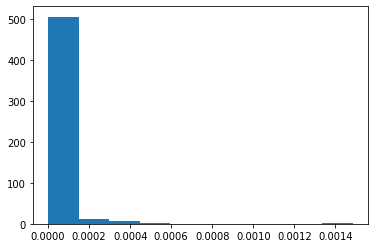

In [80]:
plt.hist(allweights)
plt.show()

In [81]:
# now put everything in a dataframe 
conn = pd.DataFrame({'start_skid':starts, 'end_skid':ends, 'weight':allweights})
# add neuron names 
conn['name_start'] = [skid_names[sk] for sk in conn.start_skid]
conn['name_end'] = [skid_names[sk] for sk in conn.end_skid]
# add neuron names with side 
conn['fullname_start'] = [skid_fullnames[sk] for sk in conn.start_skid]
conn['fullname_end'] = [skid_fullnames[sk] for sk in conn.end_skid]

conn.sort_values(by = ['weight'], ascending=False)

start_skid end_skid    weight    name_start name_end      fullname_start  \
17     8246081  6611894  0.001485        67b PN   DAN-i1        67b PN right   
310    8256186  6611894  0.000457        30a PN   DAN-i1        30a PN right   
381    4651929  6611894  0.000343  94a & 94b PN   DAN-i1  94a & 94b PN right   
68     3486381  7057894  0.000335        42a PN   DAN-i1         42a PN left   
425    7198338  7057894  0.000335        24a PN   DAN-i1         24a PN left   
..         ...      ...       ...           ...      ...                 ...   
307    8256186  4414184  0.000001        30a PN   DAN-j1        30a PN right   
300    8256186  3886356  0.000001        30a PN   DAN-d1        30a PN right   
153    8245513  6611894  0.000001        63a PN   DAN-i1        63a PN right   
146    8245513  4414184  0.000001        63a PN   DAN-j1        63a PN right   
413    8245014  4414184  0.000001        59a PN   DAN-j1        59a PN right   

    fullname_end  
17   MBE1c right  
310  MBE1c right  
381  MBE1c right  
68    MBE1c left  
425   MBE1c left  
..           ...  
307  MBE1d right  
300   MBE4h left  
153  MBE1c right  
146  MBE1d right  
413  MBE1d right  

[526 rows x 7 columns]

In [82]:
# compress all 2-hop paths between 2 skids into one edge 
# reset_index() turns the result into a proper dataframe 
conn_comp = conn.groupby(['fullname_start','fullname_end','name_start','name_end'])['weight'].sum().reset_index()
conn_comp

fullname_start fullname_end    name_start name_end    weight
0           13a PN left   MBE1d left        13a PN   DAN-j1  0.000010
1           13a PN left   MBE4f left        13a PN   DAN-g1  0.000045
2           13a PN left   MBE4h left        13a PN   DAN-d1  0.000012
3          13a PN right  MBE1b right        13a PN   DAN-k1  0.000041
4          13a PN right   MBE1c left        13a PN   DAN-i1  0.000020
..                  ...          ...           ...      ...       ...
286  94a & 94b PN right  MBE1d right  94a & 94b PN   DAN-j1  0.000011
287  94a & 94b PN right  MBE4a right  94a & 94b PN   DAN-f1  0.000145
288  94a & 94b PN right  MBE4f right  94a & 94b PN   DAN-g1  0.000066
289  94a & 94b PN right  MBE4g right  94a & 94b PN   DAN-c1  0.000012
290  94a & 94b PN right  MBE4h right  94a & 94b PN   DAN-d1  0.000062

[291 rows x 5 columns]

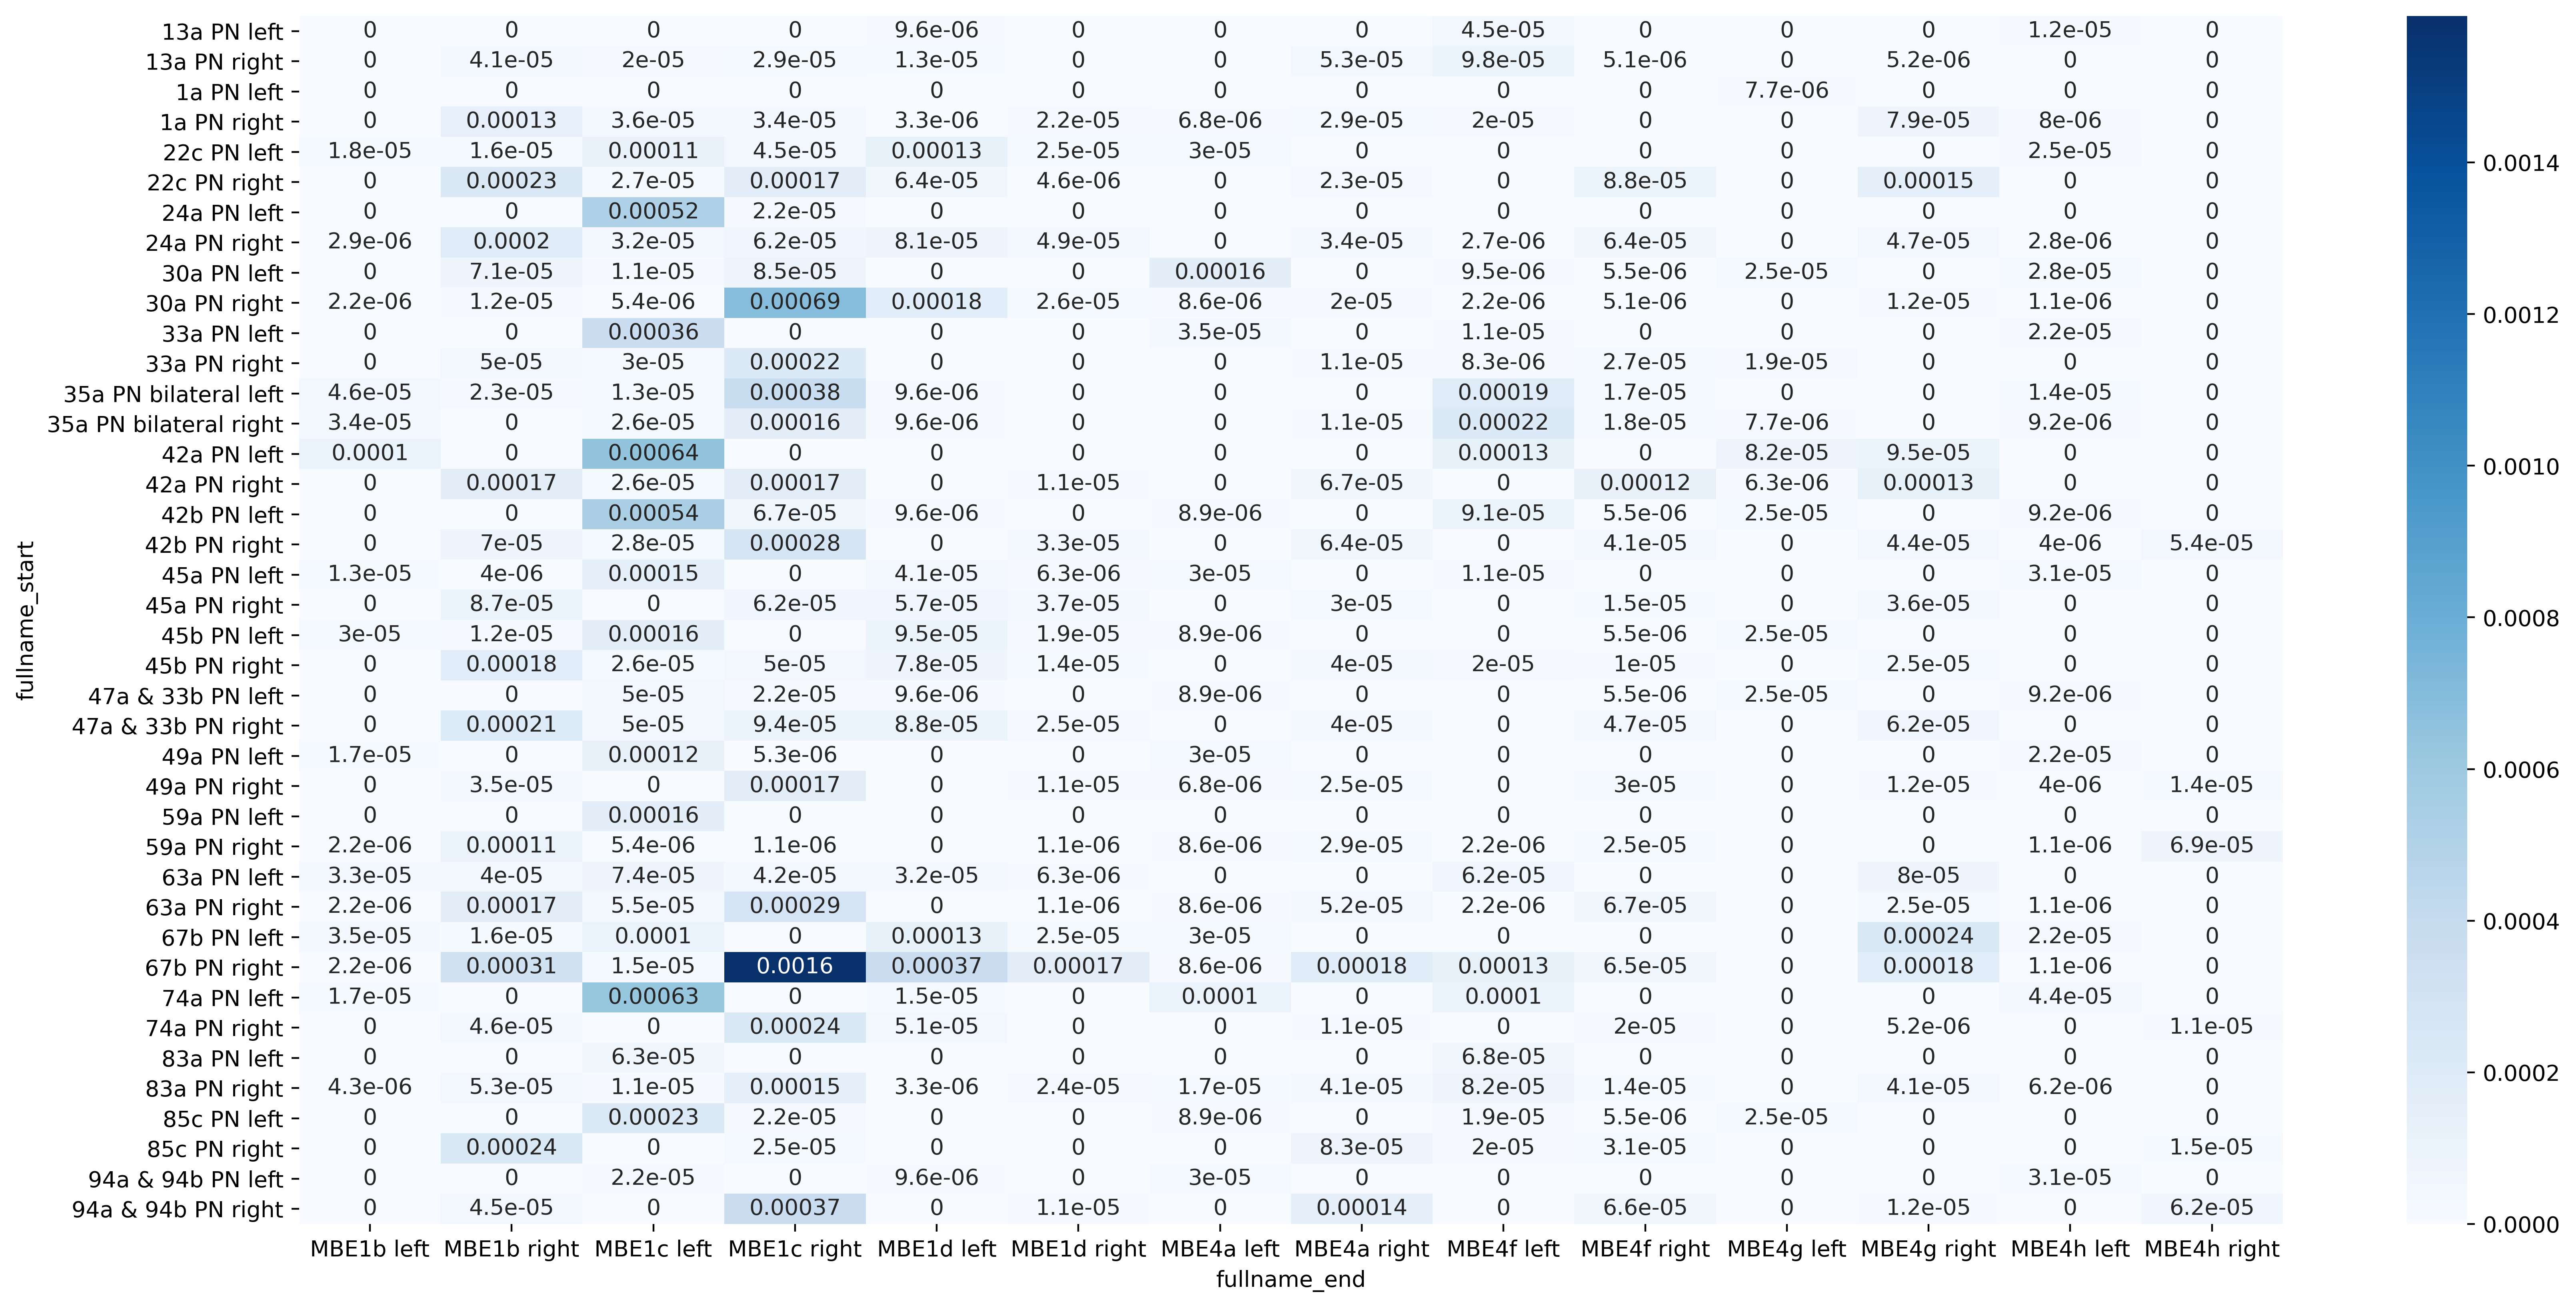

In [87]:
connm = conn_comp.pivot(index='fullname_start', columns='fullname_end', values='weight').fillna(0)
plt.figure(figsize = (20,10), dpi = 400)
sns.heatmap(connm, annot = True, cmap="Blues")
plt.savefig(os.path.join(os.getcwd(), 'plots', 'PN_DAN_skid.pdf'))

In [84]:
# or, take the average of left and right 
# reset_index() turns the result into a proper dataframe 
conn_comp_type = conn.groupby(['name_start','name_end'])['weight'].mean().reset_index()
conn_comp_type

name_start name_end    weight
0          13a PN   DAN-c1  0.000005
1          13a PN   DAN-d1  0.000006
2          13a PN   DAN-f1  0.000027
3          13a PN   DAN-g1  0.000037
4          13a PN   DAN-i1  0.000025
..            ...      ...       ...
130  94a & 94b PN   DAN-f1  0.000044
131  94a & 94b PN   DAN-g1  0.000033
132  94a & 94b PN   DAN-i1  0.000130
133  94a & 94b PN   DAN-j1  0.000010
134  94a & 94b PN   DAN-k1  0.000015

[135 rows x 3 columns]

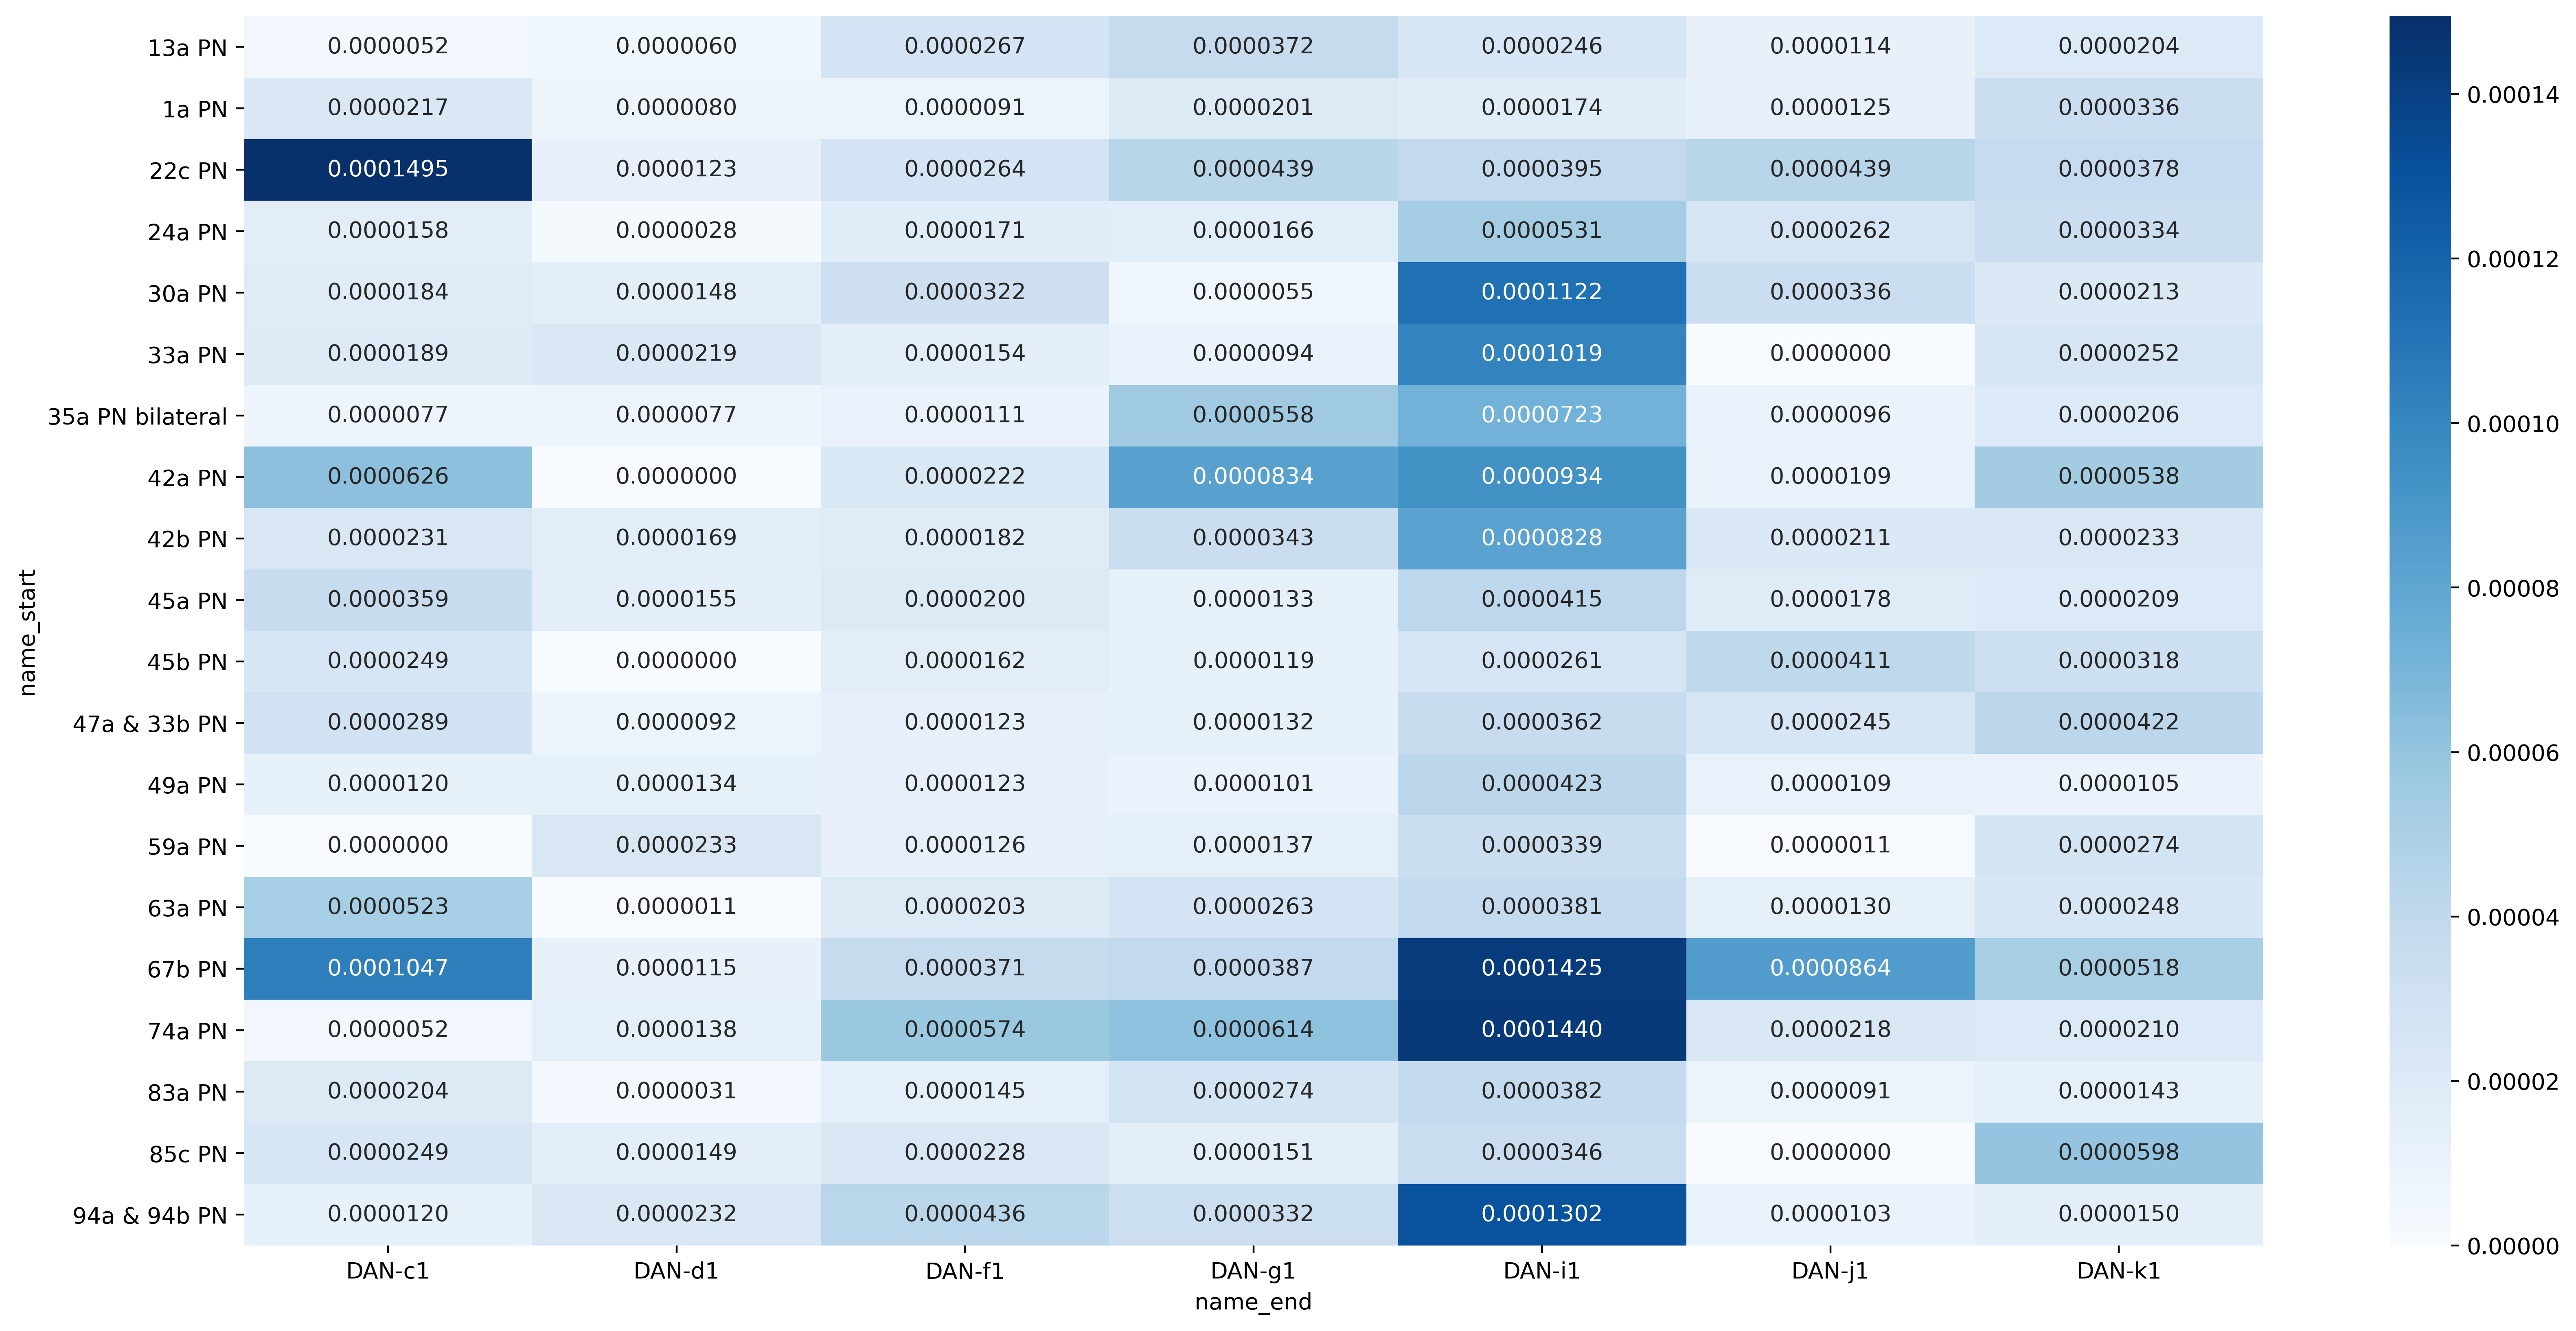

In [85]:
connm_type = conn_comp_type.pivot(index='name_start', columns='name_end', values='weight').fillna(0)
plt.figure(figsize = (20,10), dpi = 400)
sns.heatmap(connm_type, annot = True, cmap="Blues", fmt='.7f')
plt.savefig(os.path.join(os.getcwd(), 'plots', 'PN_DAN.pdf'))

## Checking paths in more detail 

In [93]:
start_type = '67b PN'
end_type = 'MBE1c'
start_skids = list(allns.skid[allns.name == start_type])
end_skids = list(allns.skid[allns.name == end_type])

selected_paths = list(filter(lambda apath: (apath[0] in start_skids) and (apath[-1] in end_skids), allpaths))

# get all the ids involved to get the names 
unique_ids = []
for apath in selected_paths: 
    unique_ids += apath
unique_ids = set(unique_ids) 
allnames = pymaid.get_names(unique_ids)

for apath in selected_paths: 
    weights = []
    for node in range(len(apath)-1): 
        weights.append(round(g[apath[node]][apath[node + 1]]['weight'], 6))
    # get neuron names 
    names = [allnames[node] for node in apath]
    
    print(apath, weights, names)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


['8246081', '7421507', '6611894'] [0.031175, 0.047619] ['67b PN right', 'DALl1 2 right', 'MBE1c right']
['8246081', '3234817', '6611894'] [0.001037, 0.001037] ['67b PN right', 'MBE12 right', 'MBE1c right']
['8246081', '8546775', '6611894'] [0.005076, 0.005714] ['67b PN right', 'DPLam hook right', 'MBE1c right']
['8246081', '9585145', '6611894'] [0.009346, 0.00381] ['67b PN right', 'GX; Right ', 'MBE1c right']
['8246081', '7431625', '6611894'] [0.012903, 0.001905] ['67b PN right', 'S2: DPLam l 5_ right', 'MBE1c right']
['8246081', '4101621', '6611894'] [0.005102, 0.001905] ['67b PN right', 'AF2: PDLl2_right_sibling 35', 'MBE1c right']
['8246081', '8847957', '6611894'] [0.004566, 0.001905] ['67b PN right', 'Bridge II_right', 'MBE1c right']
['8246081', '3234817', '7057894'] [0.001037, 0.005187] ['67b PN right', 'MBE12 right', 'MBE1c left']
['8246081', '8034919', '7057894'] [0.00277, 0.003623] ['67b PN right', 'AV ; DPLc ant lat 1_right', 'MBE1c left']
['16259595', '2369444', '7057894'] [0

# KC-PNs 
Let's try to reproduce some findings between KCs and PNs 

In [118]:
opnds = pymaid.get_partners(opns.skid.values, directions = ['outgoing'], 
                            min_confidence=3, 
                            # question: does the min_size make sense? 
                            min_size = 100)
opnds

INFO  : Fetching connectivity table for 42 neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Done. Found 0 pre-, 647 postsynaptic and 0 gap junction-connected neurons (pymaid)


neuron_name skeleton_id num_nodes    relation 3486381  \
0                broad T3 right     6557581      6281  downstream       0   
1                 broad T3 left     7939890      5829  downstream      26   
2                broad T1 right     8198317      6047  downstream       0   
3                broad T2 right     8198238      6885  downstream       0   
4                 broad T1 left     7939979      6291  downstream      17   
..                          ...         ...       ...         ...     ...   
642     Ladder (olfactory) ant.    17068730      9184  downstream       0   
643                67b ORN left     6791927      1075  downstream       0   
644             S1: neuron left    14434314      2682  downstream       0   
645  BLAd ant med 3 neuron left     3946569      1948  downstream       0   
646           O ; BAmd1 v_right     5321459      4632  downstream       0   

    4354933 4493199 4651929 7092417 7107433  ... 8248631 8252067 8253413  \
0         0       0      10       0       0  ...      13       3      15   
1        21      12       0       5       9  ...       0       0       0   
2         0       0      11       0       0  ...      12       0      14   
3         0       0       6       0       0  ...      11       3      10   
4        28       9       0       5      11  ...       0       0       0   
..      ...     ...     ...     ...     ...  ...     ...     ...     ...   
642       0       0       0       0       0  ...       0       0       0   
643       0       0       0       0       0  ...       0       0       0   
644       0       0       0       0       0  ...       0       0       0   
645       0       0       0       0       0  ...       0       0       0   
646       0       0       0       0       0  ...       0       0       0   

    8256186 8399890 11279244 13589251 14604028 16259595  total  
0         7       0       13        0       30        0  255.0  
1         0      14        0        0        0       22  242.0  
2        18       0       14        0       20        0  223.0  
3         7       0       16        0       25        0  222.0  
4         0      12        0        0        0        7  218.0  
..      ...     ...      ...      ...      ...      ...    ...  
642       0       0        0        0        0        1    1.0  
643       0       0        0        0        0        1    1.0  
644       0       0        0        0        0        1    1.0  
645       0       0        0        0        0        1    1.0  
646       0       0        0        0        0        1    1.0  

[647 rows x 47 columns]

In [119]:
# which neurons are downstream? 
opnds.neuron_name.unique()

array(['broad T3 right', 'broad T3 left', 'broad T1 right',
       'broad T2 right', 'broad T1 left', 'broad T2 left',
       'mPN iACT A1 right', 'LH bilateral axon 4_right; BLVa12 b 4',
       'keystone right', 'LH bilateral axon 1_left; BLVa12 b 2',
       'mPN iACT A1 left', 'Oval 42a_right', 'LH to pseudo bridges_left',
       'keystone left', 'LH bilateral axon 3_right',
       'Projection from LH 1_right', 'Oval 42a_left', 'Bridge II_right',
       'LH bilateral axon 1_right; BLVa12 b 2',
       'Projection from LH 2_left', 'S: Peptidergic_sibling 35_right',
       'LH bilateral axon 4_left; BLVa12 b 4',
       'LH to pseudo bridges_right', 'Projection from LH 2_right',
       'Bridge I_right', 'AL: CP23 d 3_right', 'PVM_42a_LH_left',
       'T3: PVLr_right', 'US2: BLP12 b 4_right', 'Bridge III_left',
       'S: Peptidergic_sibling 35_left', 'Projection from LH 1_left',
       'KC no pair', 'Bridge III_right', 'AF15: off suckerfish_right',
       'broad D1 right', 'broad D2 left

Many neurons besides KCs 

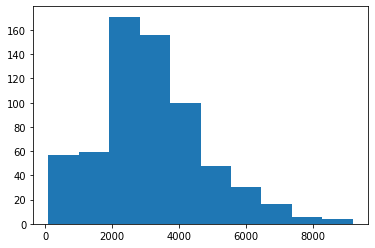

In [120]:
plt.hist(opnds.num_nodes)
plt.show()

In [135]:
pndskcs = opnds.loc[['KC' in name for name in opnds.neuron_name],'skeleton_id']
# get all upstream of these KCs 
kcus = pymaid.get_partners(pndskcs, directions = ['incoming'], 
                            min_confidence=3, 
                            # question: does the min_size make sense? 
                            min_size = 100)
kctotpost = kcus[pndskcs].sum()
kctotpost

INFO  : Fetching connectivity table for 159 neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Done. Found 440 pre-, 0 postsynaptic and 0 gap junction-connected neurons (pymaid)


16630024    186
29          203
14522124    190
10056280    250
16629931    168
           ... 
8066542     263
17544019     10
4227544     224
4415241     369
4412315     157
Length: 159, dtype: object

In [153]:
# get meta info of the kcs 
kc_names = pymaid.get_names(pndskcs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


In [158]:
# edgelist 
kcus_el = kcus.melt(id_vars = ['neuron_name', 'skeleton_id'], 
                       value_vars = pndskcs, 
                       var_name = 'ds_skid', 
                       value_name='syn_count')
# remove the non-PNs 
kcus_el = kcus_el.loc[['PN' in name for name in kcus_el.neuron_name]]

# merge the total postsynaptic neuronsynapse count 
# using list() removes the index of the total post synapses. Otherwise there's an error
kcus_el['totpostsyn'] = list(kctotpost[kcus_el.ds_skid])
kcus_el['weight'] = kcus_el.syn_count / kcus_el.totpostsyn

# add KC names 
kcus_el['kc_name'] = [kc_names[skid] for skid in kcus_el.ds_skid]
kcus_el

neuron_name skeleton_id   ds_skid syn_count  \
15                             22c PN left     7865652  16630024         0   
30                             85c PN left     4354933  16630024         0   
32                            42b PN right     8245692  16630024         0   
33                            22c PN right     8248631  16630024         0   
36                             74a PN left     7843730  16630024        14   
...                                    ...         ...       ...       ...   
69901                          mPN D right     3538129   4412315         0   
69902  PN Only Connects To Togethers Right     3756659   4412315         0   
69916                     Unknown PN right    17977058   4412315         0   
69925                     BAmd1 PN 2 right    17036160   4412315         1   
69949                       mPN iACT VUM L     9119558   4412315         0   

       totpostsyn    weight     kc_name  
15            186       0.0  KC no pair  
30            186       0.0  KC no pair  
32            186       0.0  KC no pair  
33            186       0.0  KC no pair  
36            186  0.075269  KC no pair  
...           ...       ...         ...  
69901         157       0.0      KC2/24  
69902         157       0.0      KC2/24  
69916         157       0.0      KC2/24  
69925         157  0.006369      KC2/24  
69949         157       0.0      KC2/24  

[11925 rows x 7 columns]

<AxesSubplot:xlabel='ds_skid', ylabel='neuron_name'>

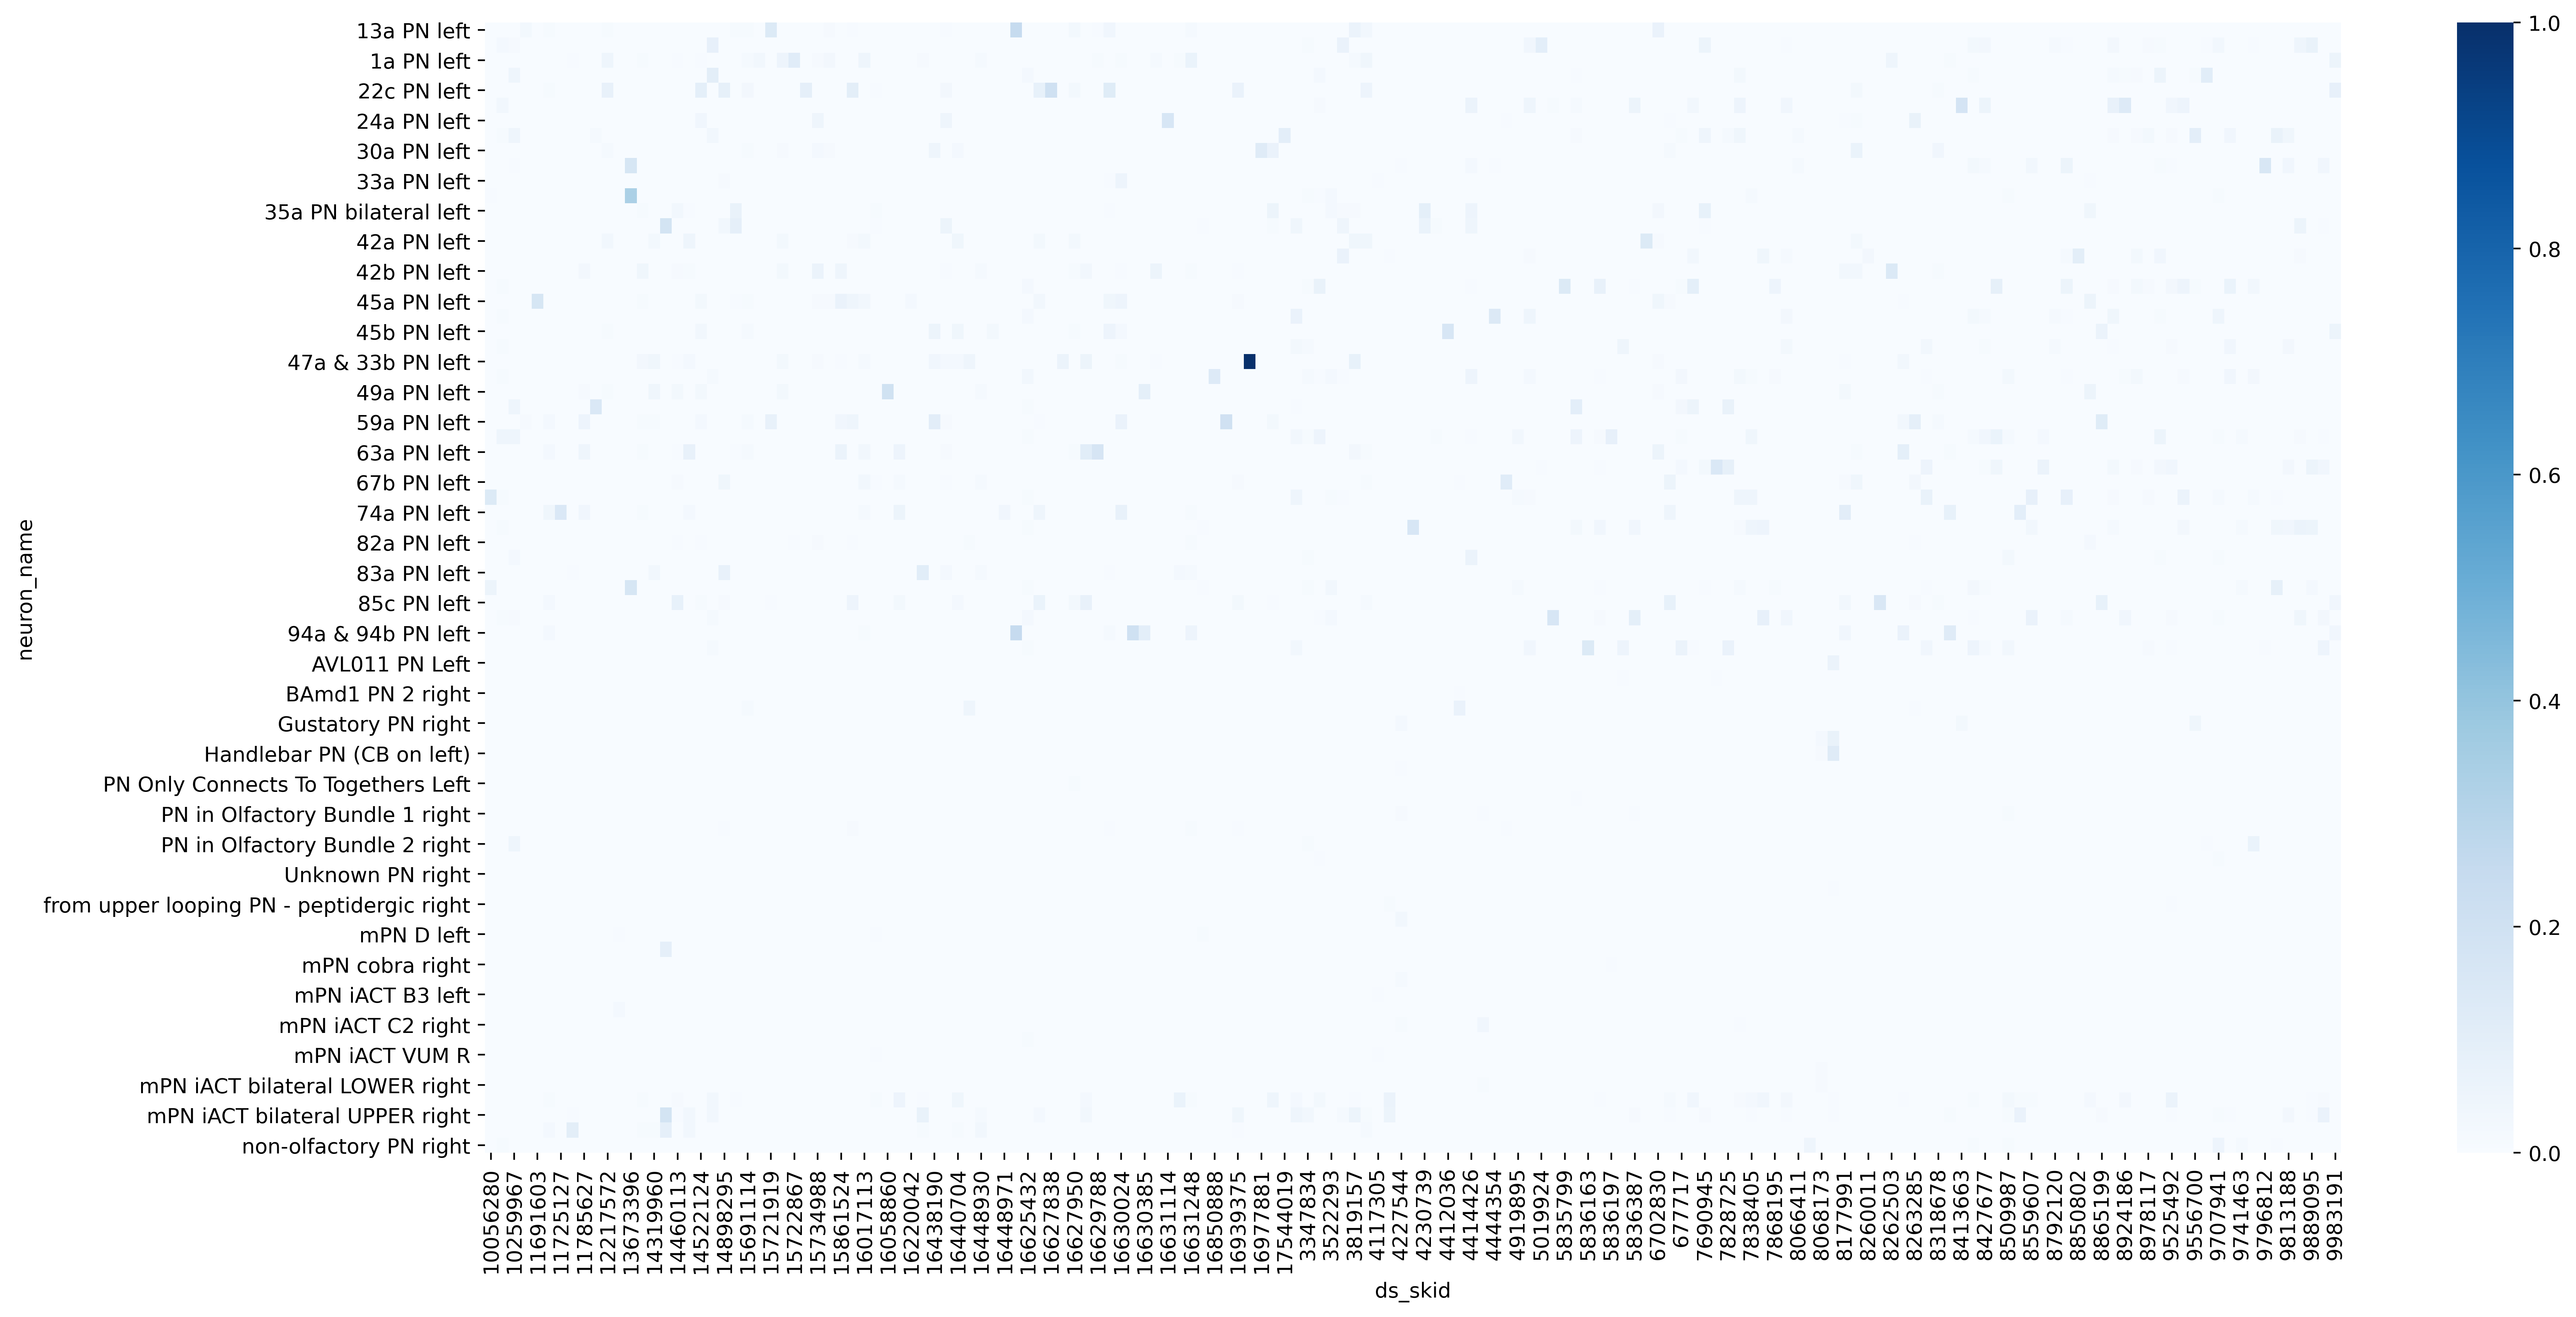

In [164]:
kcconnm = kcus_el.pivot(index='neuron_name', columns='ds_skid', values='weight').fillna(0)
plt.figure(figsize = (20,10), dpi = 400)
sns.heatmap(kcconnm, cmap="Blues")
# plt.savefig(os.path.join(os.getcwd(), 'plots', 'PN_DAN.pdf'))

# Didn't work

In [84]:
g, paths = pymaid.get_paths(opns.skid.values,
                            dans.skid.values)
# question: why doesn't this work? 

ValueError: too many values to unpack (expected 2)

In [18]:
# can we split by axon/dendrites? 
opns.reroot(opns.soma)
# the following function doesn't exist 
splitopns = pymaid.split_axon_dendrite(x)
cn_table = pymaid.cn_table_from_connectors(splitopns)
cn_table.head()

reroot:   0%|          | 0/42 [00:00<?, ?it/s]

AttributeError: module 'pymaid' has no attribute 'split_axon_dendrite'